## **IN THIS NOTEBOOK WE WILL PERFORM:**
1. **EDA ANALYSIS**
2. **DATA VISUALIZATION**
3. **MODEL TRAINING**


### Author Name: Mahrose Siddiqui
### Author Email: mahrosesiddiqui18@gmail.com
Connect through 

[<img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="50" height="50">](https://www.linkedin.com/in/mahrose-siddiqui/)     [<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" width="50" height="50">](https://www.kaggle.com/mahrosesiddiqui)  [<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="50" height="50">](https://github.com/MahroseSiddiqui)  [<img src="https://png.pngtree.com/png-vector/20221018/ourmid/pngtree-twitter-social-media-round-icon-png-image_6315985.png" width="50" height="50">](https://twitter.com/MahroseSiddiqui)  


### **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

### **IMPORTING DATA**

In [2]:
df = pd.read_csv('climate_change_data.csv')

### **QUICK VIEW OF THE DATA**

In [3]:
# Gives an overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [4]:
# Display the first few rows of the DataFrame
df.head()

Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4    8.001164

In [5]:
# The shape of the DataFrame as a tuple, representing the number of rows and columns respectively
df.shape

(10000, 9)

In [6]:
# Retrieves a random sample of six rows from the DataFrame
df.sample(4)

Date     Location                   Country  \
7970  2018-05-01 11:16:08.856885632    West Nina                 Australia   
6214  2014-04-17 06:46:07.236723648  Port Ashley      Syrian Arab Republic   
6633  2015-04-04 06:39:12.475247488  Gentrymouth           Kyrgyz Republic   
655   2001-07-04 06:07:14.203420336    Ryanmouth  United States of America   

      Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
7970    18.589832     311.233077       -1.597790      47.154471  33.304428   
6214    14.754282     353.205282        0.695705      85.095837  75.388133   
6633    24.498333     328.934051        0.489433      88.377253  16.481164   
655     20.597689     403.029103       -0.489247      70.128083  38.630262   

      Wind Speed  
7970   23.515995  
6214   15.725364  
6633   19.863254  
655    25.181793

In [7]:
# Summary statistics of the numerical columns
df.describe() 

Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664

In [8]:
# Check for missing values
df.isnull().sum() 

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

### **DATA VISUALIZATION** 

In [9]:
# Visualize the data
sns.pairplot(df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']])
plt.show()

In [ ]:
# Plot a bar chart using Plotly Express
fig = px.bar(df, x="Country", y="CO2 Emissions", color="Location",
             title="CO2 Emissions by Country and Location")
fig.show()

### **GROUPING**

In [ ]:
max_vals = df.groupby('Country')['CO2 Emissions'].apply(lambda x: max(x))

max_co2 = pd.DataFrame({'Country': max_vals.index, 'Max Value': max_vals.values})

top_15 = max_co2.sort_values('Max Value', ascending=False).head(15)

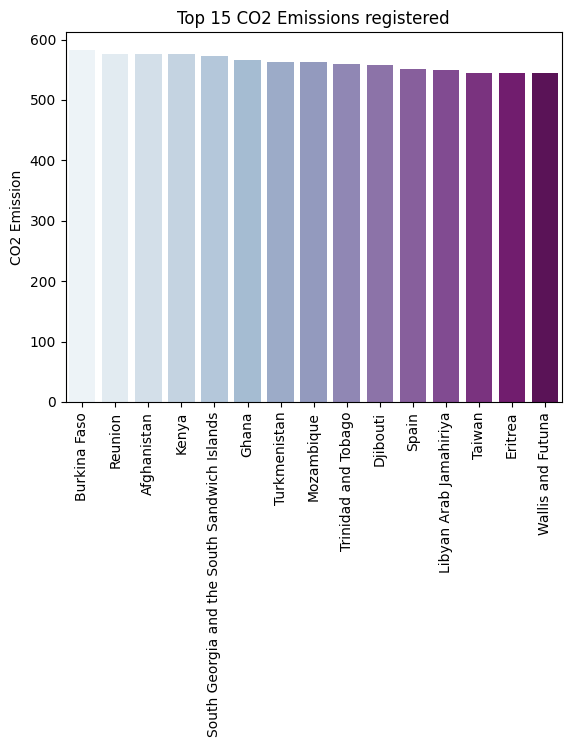

In [ ]:
sns.barplot(x = 'Country', y = 'Max Value', data = top_15, palette = "BuPu")
plt.xticks(rotation=90)
plt.ylabel('CO2 Emission')
plt.xlabel(None)
plt.title('Top 15 CO2 Emissions registered')
plt.show()

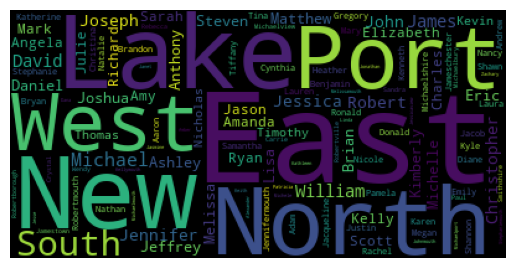

In [ ]:
# Create a word cloud of locations
wordcloud = WordCloud().generate(' '.join(df['Location']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot: xlabel='year', ylabel='Temperature'>

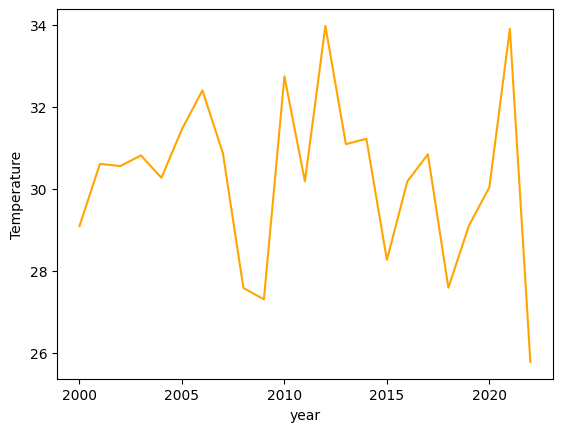

In [ ]:
## Create year_month, year, month for easier to analyse
df['year_month'] = df['Date'].dt.strftime('%Y-%m')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

## Average Temperature over time 
avg_temp_year = df.groupby('year')['Temperature'].max().reset_index()

sns.lineplot(data = avg_temp_year, x = 'year', y = 'Temperature', color = 'orange')

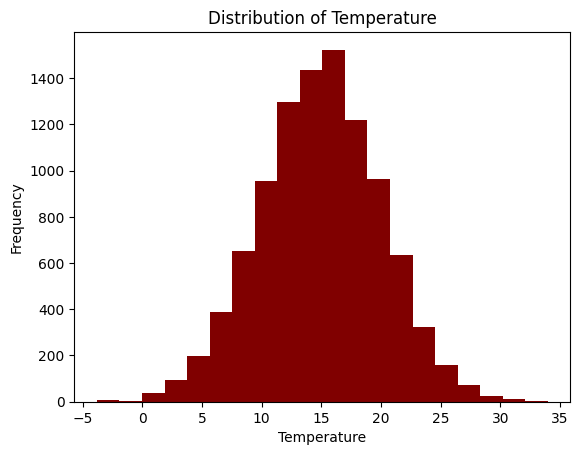

In [ ]:
# Distribution of Temperature using NumPy
temperature = df['Temperature']
plt.hist(temperature, bins=20,color = 'maroon')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

## **MODEL TRAINING**

In [ ]:
X = df[['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity', 'Wind Speed']]
y = df['Sea Level Rise']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Linear Regression - R2 score',r2_score(y_test,y_pred))
print('Linear Regression - MAE',mean_absolute_error(y_test,y_pred))
print('Linear Regression - MSE:',mean_squared_error(y_test, y_pred))

Linear Regression - R2 score -0.0017541658186506215
Linear Regression - MAE 0.7997993555250329
Linear Regression - MSE: 0.9939032233209928
